In [27]:
import os,sys
%matplotlib inline
import matplotlib.pylab as plt
import pickle
import numpy as np
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi']=300
sys.path.append(os.path.expanduser("~/Projects/Github/PyComplexHeatmap"))
from PyComplexHeatmap import *
use_pch_style() # or plt.style.use('default') to restore default style
# plt.rcParams
# import matplotlib; print(matplotlib.__version__)

In [28]:
#set font to Arial using the following code
plt.rcParams['font.family']='sans serif'
plt.rcParams['font.sans-serif']='Arial'
# set pdf.fonttype to 42
plt.rcParams['pdf.fonttype']=42

## Generate dataset

In [29]:
#Generate example dataset (random)
df = pd.DataFrame(['GroupA'] * 5 + ['GroupB'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['EF'] = ['E'] * 6 + ['F'] * 2 + ['H'] * 2
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_heatmap = pd.DataFrame(np.random.randn(30, 10), columns=['sample' + str(i) for i in range(1, 11)])
df_heatmap.index = ["Fea" + str(i) for i in range(1, df_heatmap.shape[0] + 1)]
df_heatmap.iloc[1, 2] = np.nan

In [30]:
# add a missing value to sample4
df_heatmap.loc['Fea4','sample4']=np.nan
df_box.loc['sample4','Gene4']=np.nan
df_box

,Gene1,Gene2,Gene3,Gene4
sample1,1.075311,0.228967,0.927524,0.672152
sample2,-0.314799,-0.281685,0.644737,-0.118948
sample3,0.665867,-0.783662,0.058660,0.638160
sample4,0.358290,-1.514204,-1.295826,NaN
sample5,-2.082692,-1.007376,-0.547002,-0.262894
sample6,0.231512,-0.657340,0.856358,0.634512
sample7,1.394865,0.416197,0.979652,0.200205
sample8,0.067210,-0.091365,-2.420755,1.305473
sample9,0.310952,-0.165396,0.364038,-1.409730
sample10,-1.536641,0.593269,0.570583,0.404414


## Add selected rows labels

-2.5938598759396214 2.9530486107515013


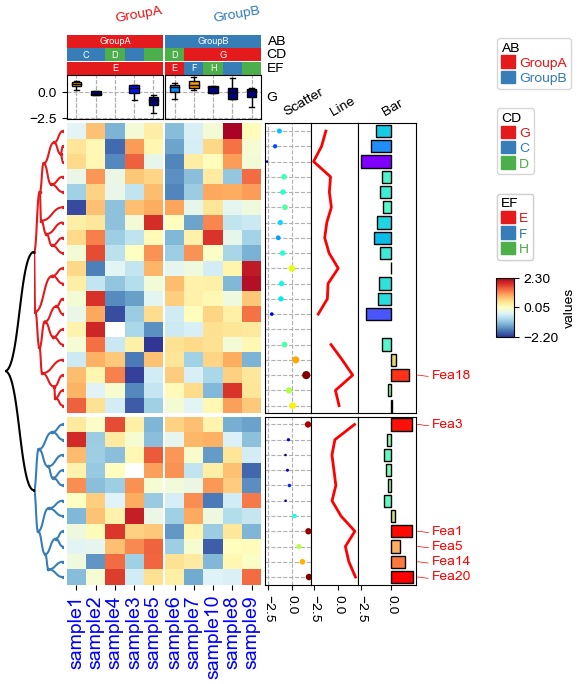

-2.2 2.3 {'vmin': -2.2, 'vmax': 2.3, 'center': None}


In [31]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                            height=12,cmap='jet',legend=False,grid=True),
            Line=anno_lineplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                            height=12,colors='red',linewidth=2,legend=False),
            Bar=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                            height=15,cmap='rainbow',legend=False),
            selected=anno_label(df_rows,colors='red',relpos=(-0.05,0.4)),
            label_kws={'rotation':30,'horizontalalignment':'left','verticalalignment':'bottom'},
            axis=0,verbose=0)

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=10,
                             arrowprops = dict(visible=False,)
                            ), #visible in arrowprops can control whether to show the arrow
            AB=anno_simple(df.AB,add_text=True),axis=1,
            CD=anno_simple(df.CD,add_text=True),
            EF=anno_simple(df.EF,add_text=True,
                            legend_kws={'frameon':True}),
            G=anno_boxplot(df_box, cmap='jet',legend=False,grid=True),
            verbose=0)

print(np.nanmin(df_heatmap),np.nanmax(df_heatmap))

plt.figure(figsize=(5.5, 6.5))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, z_score=0,vmin=-2.2,vmax=2.3,
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,col_dendrogram=False,row_dendrogram_size=15,
        show_rownames=False,show_colnames=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='RdYlBu_r',bezier=True,dotsize=2,
        xticklabels_kws=dict(labelrotation=90,labelcolor='blue',labelsize=14,grid_color='red',bottom=True))
# for ax in cm.top_annotation.axes[-1,:]:
#     ax.cla()
plt.savefig("example0.pdf", bbox_inches='tight')
plt.show()
print(cm.kwargs['vmin'],cm.kwargs['vmax'],cm.legend_kws)

In [32]:
cm.heatmap_axes

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [33]:
cm.ax_heatmap.xaxis.get_tick_params()

{'rotation': 90,
 'left': True,
 'right': False,
 'labelleft': False,
 'labelright': False,
 'gridOn': False,
 'labelcolor': 'blue',
 'labelsize': 14,
 'grid_color': 'red'}

## Add annotations on the top of heatmap cells

             AB CD EF         F
sample1  GroupA  C  E -0.241813
sample2  GroupA  C  E  1.542217
sample3  GroupA  C  E -0.744642
sample4  GroupA  D  E  0.599246
sample5  GroupA  D  E -0.518975
sample1     0.725989
sample2    -0.017674
sample3     0.144756
sample4    -0.817247
sample5    -0.974991
sample6     0.266261
sample7     0.747730
sample8    -0.284859
sample9    -0.225034
sample10    0.007906
dtype: float64
       sample1   sample2   sample3   sample4   sample5   sample6   sample7  \
Fea1 -0.253388  0.072613  0.595857  1.765721  0.665006 -1.519307  0.154756   
Fea2 -0.290446 -1.316863       NaN -0.434859  0.371064  0.441762 -1.027588   
Fea3  0.440078  0.033964  0.344147  1.734288 -1.160375  0.699278  0.878399   
Fea4  0.097843  2.267251 -1.247386       NaN -2.087310 -0.872946 -0.766293   
Fea5 -0.034649  0.002974  1.055786  0.774988  1.236001 -0.456548  0.164309   

       sample8   sample9  sample10  
Fea1  0.347063 -1.258098 -1.026389  
Fea2  0.158368 -1.989878 -0.248960  
Fea

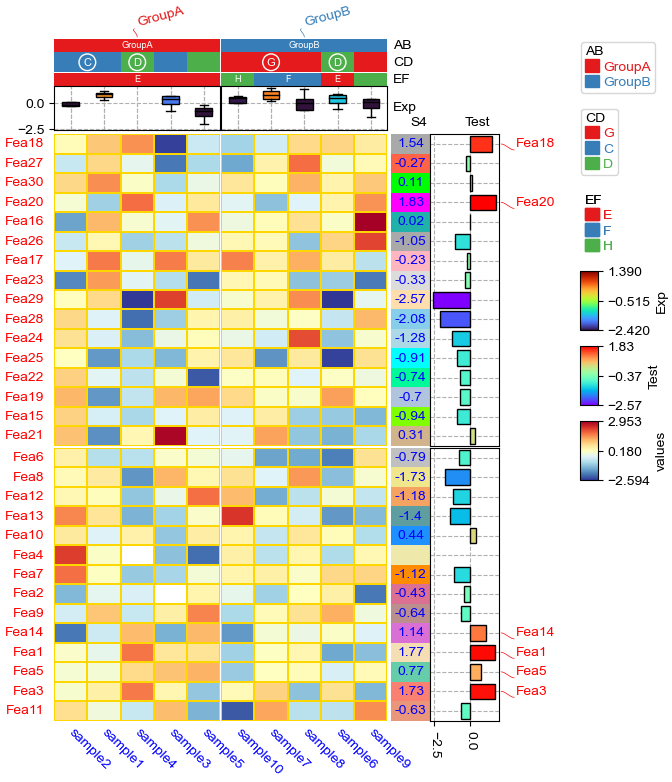

[['Fea18', 'Fea27', 'Fea30', 'Fea20', 'Fea16', 'Fea26', 'Fea17', 'Fea23', 'Fea29', 'Fea28', 'Fea24', 'Fea25', 'Fea22', 'Fea19', 'Fea15', 'Fea21'], ['Fea6', 'Fea8', 'Fea12', 'Fea13', 'Fea10', 'Fea4', 'Fea7', 'Fea2', 'Fea9', 'Fea14', 'Fea1', 'Fea5', 'Fea3', 'Fea11']]
[['sample2', 'sample1', 'sample4', 'sample3', 'sample5'], ['sample10', 'sample7', 'sample8', 'sample6', 'sample9']]


In [34]:
#Annotate the rows with average > 0.3
df_rows = df_heatmap.apply(lambda x:x.name if x.sample4 > 0.5 else None,axis=1)
df_rows=df_rows.to_frame(name='Selected')
df_rows['XY']=df_rows.index.to_series().apply(lambda x:'A' if int(x.replace('Fea',''))>=15 else 'B')

row_ha = HeatmapAnnotation(
            S4=anno_simple(df_heatmap.sample4.apply(lambda x:round(x,2) if not pd.isna(x) else ''),
                       add_text=True,height=10,legend=False,
                       text_kws={'rotation':0,'fontsize':10,'color':'blue'}),
            # Scatter=anno_scatterplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
            #                  height=10),
            Test=anno_barplot(df_heatmap.sample4.apply(lambda x:round(x,2)),
                        height=18,cmap='rainbow',grid=True),
            selected=anno_label(df_rows,colors='red'),
            axis=0,verbose=0,#wgap=4,
            label_kws={'rotation':0,'horizontalalignment':'left',
                                        'verticalalignment':'bottom'})

col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True),axis=1,
            CD=anno_simple(df.CD,add_text=True,text_kws=dict(bbox={'boxstyle':'Circle','edgecolor':'white','fill':False},fontsize=8),
                           height=4.5),
            EF=anno_simple(df.EF,add_text=True,
                            legend_kws={'frameon':False}),
            Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
            verbose=0,#hgap=2
            ) #verbose=0 will turn off the log.

print(df.head())
print(df_box.mean(axis=1))
print(df_heatmap.head())
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
            data=df_heatmap, top_annotation=col_ha,right_annotation=row_ha,
            col_split=df.AB,
            row_split=df_rows.XY, 
            #col_split_gap=3.5,row_split_gap=2.5,
            col_cluster=True,row_cluster=True,
            label='values',row_dendrogram=False,
            show_rownames=True,show_colnames=True,
            verbose=0,legend_gap=5,#legend_hpad=10,legend_vpad=5,
            annot=False,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
            xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
            yticklabels_kws=dict(labelcolor='red'),#subplot_gap=8
) 
#subplot_gap controls the gap between main heatmap and column or row annotations

plt.show()
print(cm.row_order)
print(cm.col_order)

## Only plot the annotations

In [35]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
print(df)
print(df_box.head())
print(df_scatter)
print(df_bar)
print(df_bar1)
print(df_bar2)
print(df_bar3)
print(df_bar4)

              AB CD         F
sample1    AAAA1  C  0.305827
sample2    AAAA1  C  0.129654
sample3    AAAA1  C -0.243415
sample4    AAAA1  D -0.392435
sample5    AAAA1  D -1.003669
sample6   BBBBB2  D  0.442047
sample7   BBBBB2  G -0.138081
sample8   BBBBB2  G  0.096577
sample9   BBBBB2  G -0.826878
sample10  BBBBB2  G  1.638319
            Gene1     Gene2     Gene3     Gene4
sample1 -1.002096 -0.596340 -0.231085 -0.239818
sample2 -0.297032 -1.436927 -0.299383 -0.458433
sample3 -1.756287 -1.048033  0.259914  1.066661
sample4  0.005607  1.994900 -0.130163  0.019481
sample5 -0.761169  0.700696 -0.581690  0.316787
           Scatter
sample1   6.217530
sample2   0.975727
sample3   3.309196
sample4   8.002665
sample5   8.867907
sample6   0.778432
sample7   8.404493
sample8   9.869029
sample9   0.107129
sample10  7.706634
              TMB1      TMB2
sample1   2.850296  0.976837
sample2   4.197997  8.169151
sample3   1.478323  0.319599
sample4   4.829550  9.855349
sample5   9.774495  9.472632

Starting plotting HeatmapAnnotations


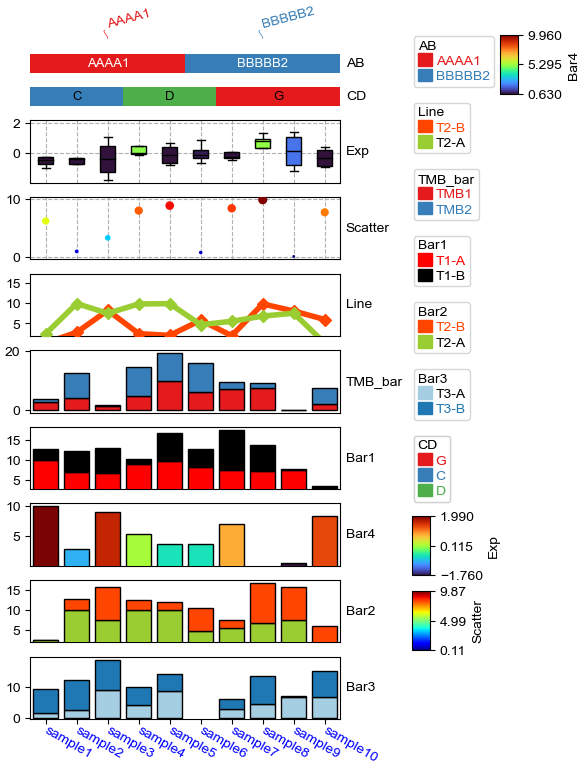

In [36]:
plt.figure(figsize=(4, 8))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True), axis=1,
            CD=anno_simple(df.CD, add_text=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
            Scatter=anno_scatterplot(df_scatter,legend=True,grid=True), 
            Line=anno_lineplot(df_bar2,linewidth=4,colors={'T2-B':'orangered','T2-A':'yellowgreen'},
                              marker='D',legend=True),  #colors=['orangered','yellowgreen']
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,colors=['red','black']), #colors can be str, list, tuple or dict
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,colors={'T2-B':'orangered','T2-A':'yellowgreen'}),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,legend_gap=5,hgap=4,
            # legend_order=False,
            # legend_order=['AB','CD','Line','Bar1'],legend_width=20
)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## Change orentation to `down` and add extra space

Starting plotting HeatmapAnnotations


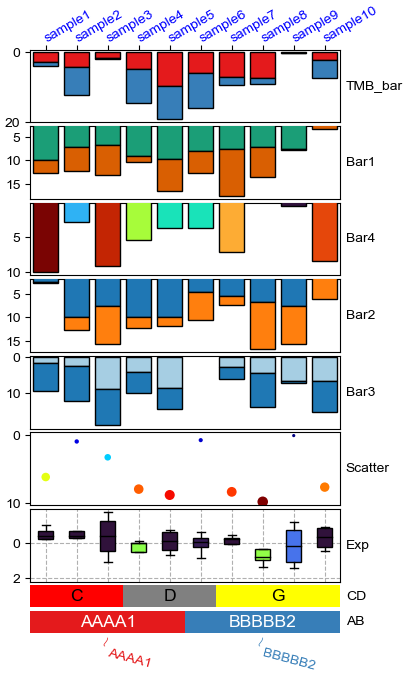

In [37]:
plt.figure(figsize=(4, 8))
row_ha = HeatmapAnnotation(
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            Scatter=anno_scatterplot(df_scatter), 
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True,grid=True),
            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'yellow'},
                           add_text=True,legend=True,text_kws={'color':'black'}),
            AB=anno_simple(df.AB,add_text=True,legend=True),
            label=anno_label(df.AB, merge=True,rotation=-15),
            plot=True,plot_legend=False,legend_hpad=13,axis=1,hgap=1
            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=30)
plt.show()
# Here, we can use hgap (when axis=1) or wgap (when axis=0) to control the widh of height space between different annotations.

## Change orentation to the left

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


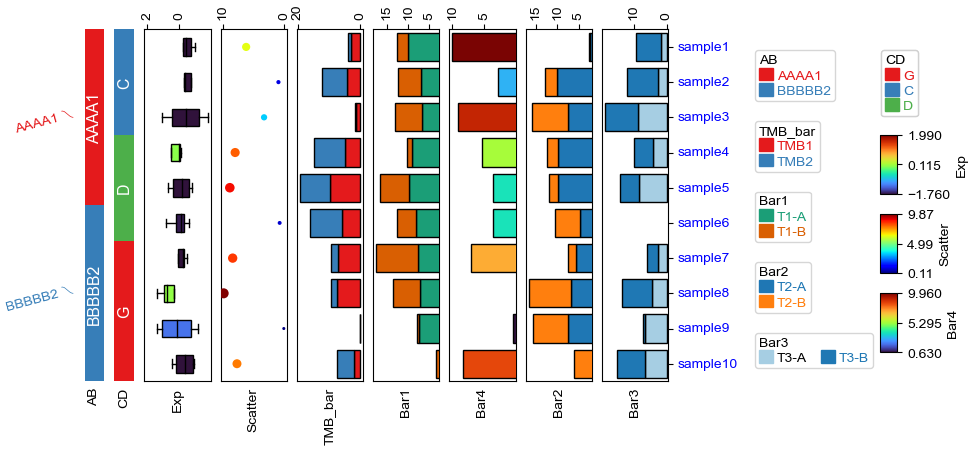

In [38]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,legend=True,
                           #text_kws=dict(bbox={"pad":0},va='center',ha='center',rotation_mode='anchor')
                          ),
            CD=anno_simple(df.CD,add_text=True,legend=True),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,legend_gap=5,
            axis=0,legend_hpad=20,label_side='bottom',wgap=3,
            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=0)
plt.show()

## Change orentation to the right

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


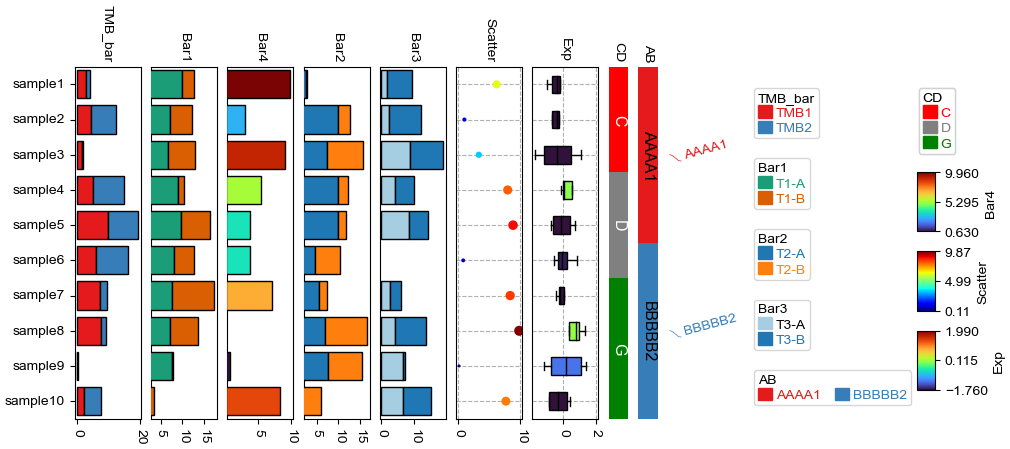

In [39]:
plt.figure(figsize=(8, 4))
row_ha = HeatmapAnnotation(
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            Scatter=anno_scatterplot(df_scatter,grid=True), 
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True,grid=True),
            CD=anno_simple(df.CD, colors={'C': 'red', 'D': 'gray', 'G': 'green'},
                           add_text=True,legend=True,
                           text_kws={'rotation':-90}),
            AB=anno_simple(df.AB,add_text=True,legend=True,
                           text_kws={'rotation':-90,'color':'black'}),
            label=anno_label(df.AB, merge=True,rotation=15),
            plot=True,legend=True,legend_hpad=13,legend_gap=5,axis=0,wgap=3,
            )
row_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'black'},rotation=0)
plt.show()

## Changing orientation using parameter `orientation` 
By Default, if there is no `anno_label` in the annotation, the oriention would be determined by parameter `orientation`.

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


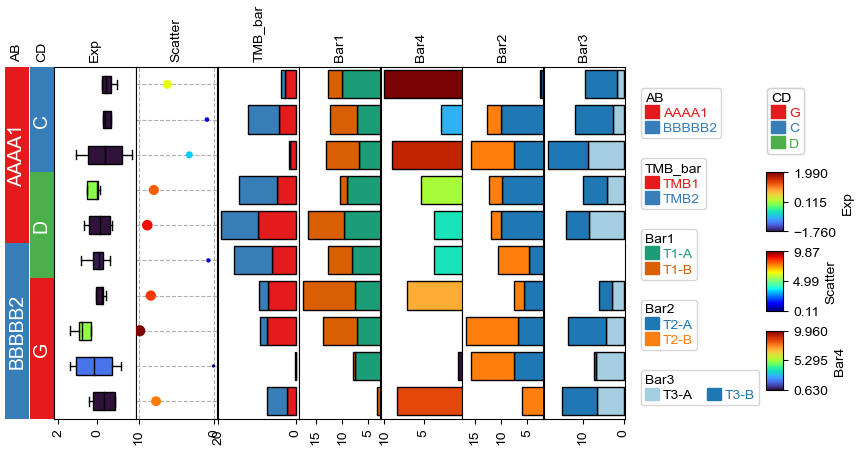

In [40]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
            AB=anno_simple(df.AB,add_text=True,legend=True),
            CD=anno_simple(df.CD,add_text=True,legend=True),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter,grid=True), 
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,axis=0,
            legend_gap=5,orientation='left',
            )
plt.show()

Starting plotting HeatmapAnnotations
Incresing ncol
Incresing ncol
Incresing ncol
More than 3 cols is not supported
Legend too long, generating a new column..


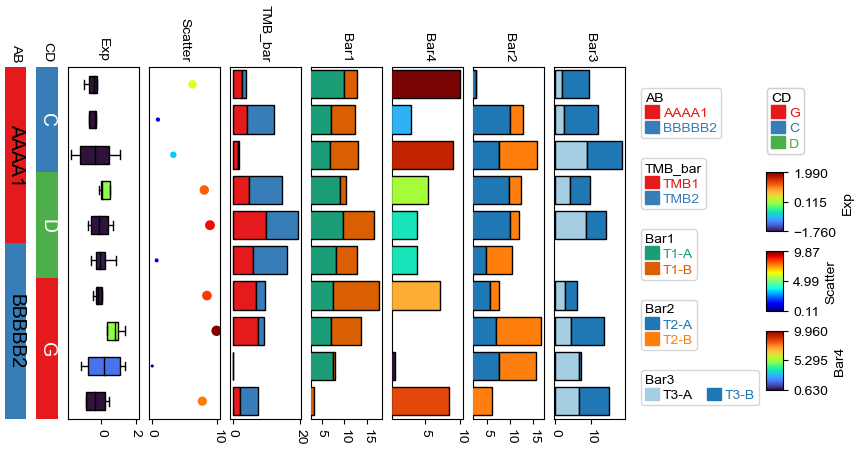

In [41]:
plt.figure(figsize=(8, 4))
col_ha = HeatmapAnnotation(
            AB=anno_simple(df.AB,add_text=True,legend=True,
                          text_kws={'rotation':-90,'fontsize':14,'color':'black'}),
            CD=anno_simple(df.CD,add_text=True,legend=True,
                          text_kws={'rotation':-90,'fontsize':14,'color':'white'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            TMB_bar=anno_barplot(df_bar,legend=True,cmap='Set1'),
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Bar2=anno_barplot(df_bar2,legend=True,cmap='tab10'),
            Bar3=anno_barplot(df_bar3,legend=True,cmap='Paired'),
            plot=True,legend=True,axis=0,wgap=3,
            legend_gap=5,orientation='right',
            )
plt.show()

## Add multiple heatmap annotations using `for` loop
Typically, we can create a heatmap annotatin using the following code:<br>

```python

col_ha = HeatmapAnnotation(
                        Group=anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                        CellType=anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend),
                        M1=anno_simple(df_cols['M1'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M1'}),
                        verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})
```
<br>
But what if we have many annotations, for example:<br>

```python

col_ha = HeatmapAnnotation(
                        Group=anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                        CellType=anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend),
                        M1=anno_simple(df_cols['M1'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M1'}),
                        M2=anno_simple(df_cols['M2'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M2'}),
                        M3=anno_simple(df_cols['M3'],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':'M3'}),
                        .....
                        verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})
```

<br>

In this case, we can create an dict including the name and annotation as keys and values:<br>

```python
col_ha_dict={
                'Group':anno_simple(df_cols.hypomethylated_samples,colors=sample_group_color_dict,legend=True),
                'CellType':anno_simple(df_cols.CellType,colors=ct_color_dict,legend=ct_legend)
                }


for col in sample_cols:
    col_ha_dict[col]=anno_simple(df_cols[col],cmap='jet',legend=lgd,vmax=1,vmin=0,legend_kws={'label':col})
    
col_ha = HeatmapAnnotation(**col_ha_dict,
                           verbose=0,label_side='right',label_kws={'horizontalalignment':'left'})

```

## Cluster between groups and cluster within groups
Similar to `cluster_between_groups` and `cluster_within_groups` in R (https://jokergoo.github.io/2021/03/05/cluster-groups-in-complexheatmap/)

### clsuter within groups: `col_split=*, col_cluster=True`

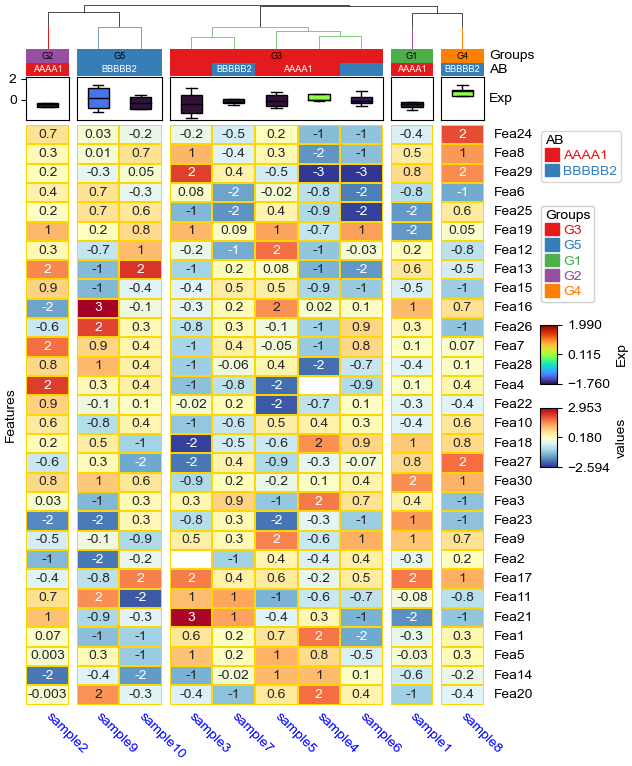

In [42]:
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2
col_ha = HeatmapAnnotation(
            Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
            AB=anno_simple(df.AB,add_text=True),axis=1,
            Exp=anno_boxplot(df_box, cmap='turbo'),
            verbose=0) #verbose=0 will turn off the log.


plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=df.Groups,col_split_gap=2,
        col_cluster=True,row_cluster=True,col_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,
        tree_kws={'col_cmap': 'Set1'},verbose=0,legend_gap=7,
        annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features',
        legend_order=['AB','Groups','Exp','values'] #change legend order
)
plt.show()

### cluster_between_groups: `col_split=*, col_split_order="cluster_between_groups",col_cluster=False`

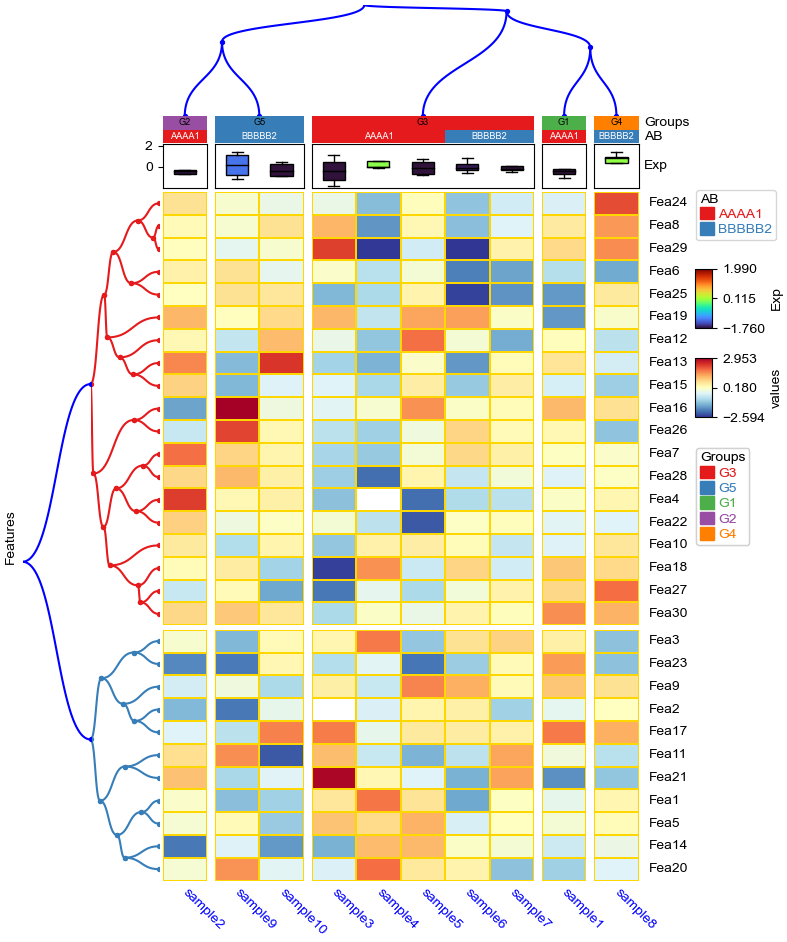

In [43]:
plt.figure(figsize=(8, 10))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=df.Groups, col_split_order="cluster_between_groups",
        col_split_gap=2,col_cluster=False,
        row_cluster=True,col_dendrogram=True,row_dendrogram_size=35,col_dendrogram_size=25,
        row_split=2,row_split_gap=1,row_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,bezier=True,dotsize=8,
        tree_kws={'colors':'blue','row_cmap':'Set1','col_cmap':'Paired'},
        verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features')
plt.show()

### cluster_within_groups && cluster_between_groups: `col_split=*, col_split_order="cluster_between_groups",col_cluster=True`

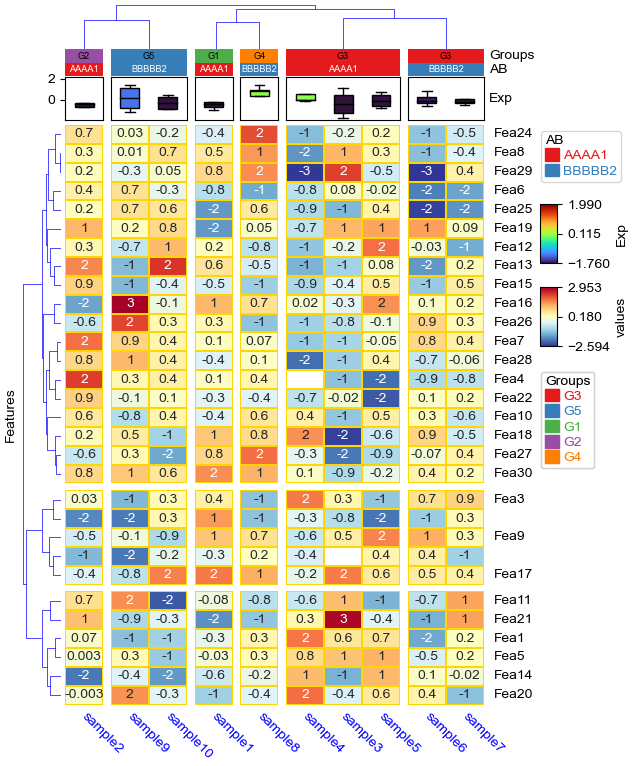

In [44]:
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_split=df.loc[:,['AB','Groups']], col_split_order="cluster_between_groups",
        col_split_gap=2,col_cluster=True,row_split_gap=1.5,
        row_split=3,#row_split_order='cluster_between_groups',
        row_cluster=True,col_dendrogram=True,row_dendrogram=True,
        label='values',show_rownames=True,show_colnames=True,
        tree_kws={'colors':'blue'},verbose=0,legend_gap=7,
        annot=True,fmt='.1g',linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'},
        ylabel='Features')
plt.show()

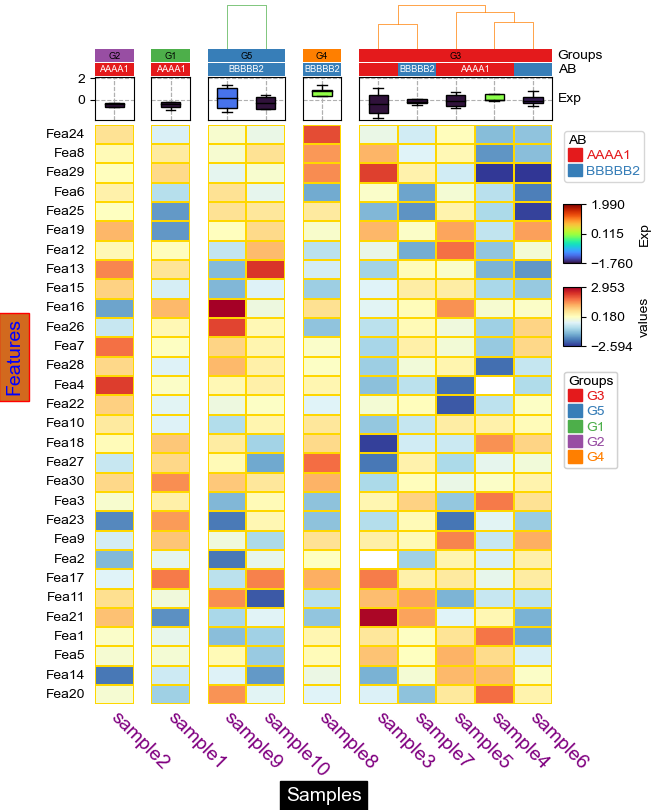

In [45]:
# `label_kws` in `HeatmapAnnotation` control the heatmap annotaiton labels
col_ha = HeatmapAnnotation(
                Groups=anno_simple(df.Groups,add_text=True,text_kws={'color':'black'}),
                AB=anno_simple(df.AB,add_text=True),axis=1,
                Exp=anno_boxplot(df_box, cmap='turbo',grid=True),
                verbose=0,label_side='right'
)

# `xticklabels_kws` and `yticklabels_kws` control the ticklabels for the heatmap.
plt.figure(figsize=(6, 8))
cm = ClusterMapPlotter(data=df_heatmap, top_annotation=col_ha,
                       col_split=df.Groups,col_split_order=['G2','G1','G5','G4','G3'],
                       col_split_gap=4.5,col_cluster=True,
                       row_cluster=True,col_dendrogram=True,
                       label='values',show_rownames=True,show_colnames=True,
                       row_names_side='left',
                       tree_kws={'col_cmap':'Set1'},verbose=0,legend_gap=7,
                       linewidths=0.05,linecolor='gold',cmap='RdYlBu_r',
                       xticklabels_kws=dict(labelrotation=-45,labelcolor='purple',labelsize=14),
                       #more parameters for [x/y]_ticklabels_kws, see: matplotlib.axes.Axes.tick_params or ?ax.tick_params
                       xlabel='Samples',ylabel="Features",
                       xlabel_kws=dict(color='white',fontsize=14),
                       ylabel_kws=dict(color='blue',fontsize=14,labelpad=45), #increace labelpad manually using labelpad (points)
                       xlabel_bbox_kws=dict(facecolor='black'),
                       ylabel_bbox_kws=dict(facecolor='chocolate',edgecolor='red'),
                      )
plt.savefig("test.pdf",bbox_inches='tight')
plt.show()

## Custom annotation

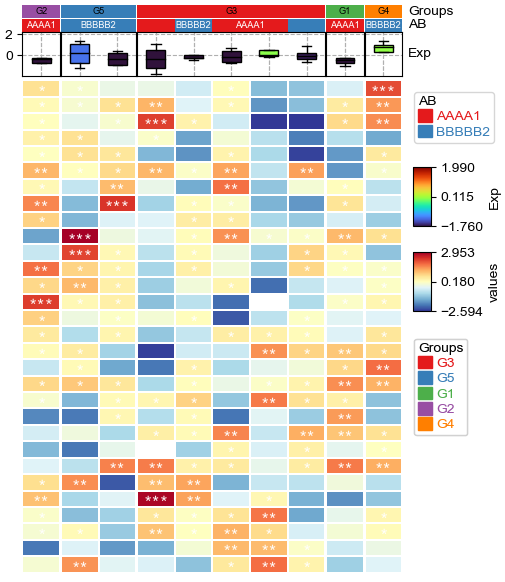

In [46]:
annot=df_heatmap.applymap(lambda x:'∗∗∗' if x >= 2 else '∗∗' if x >=1 else '∗' if x >0 else '')
# To make asterisk located at center in vertical, use ∗ ASTERISK OPERATOR. instead of normal *; see: https://unicode-explorer.com/c/2217
plt.figure(figsize=(5, 6.5))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        annot=annot,fmt=None,annot_kws={'color':'white','fontname':'Courier'},
        col_split=df.Groups, col_split_order="cluster_between_groups",
        col_cluster=True,row_cluster=True,
        label='values',
        tree_kws={'col_cmap': 'Set1'},verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='white',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()

## Custom linkage

df_heatmap shape: (30, 10) 
linkage shape: (9, 4) 
 [[ 3.          5.         17.80856436  2.        ]
 [ 7.          8.         18.00633565  2.        ]
 [ 0.          9.         18.91390845  2.        ]
 [ 2.         12.         20.28877796  3.        ]
 [ 6.         13.         20.75087617  4.        ]
 [ 4.         11.         21.84407286  3.        ]
 [10.         14.         22.01493793  6.        ]
 [ 1.         15.         22.35038154  4.        ]
 [16.         17.         22.73350196 10.        ]]


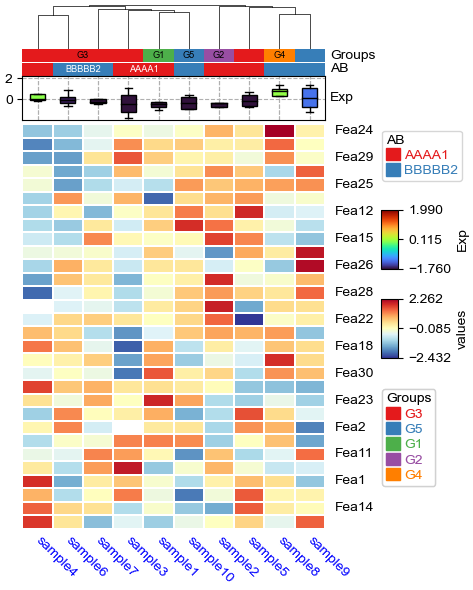

In [47]:
import fastcluster
# custom column linkage
linkage = fastcluster.linkage(df_heatmap.T.apply(lambda x:x.fillna(x.median()),axis=1), method='average', metric='canberra')
print("df_heatmap shape:",df_heatmap.shape,"\nlinkage shape:",linkage.shape,"\n",linkage)

plt.figure(figsize=(4, 6))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,z_score=0,
        col_cluster=True,row_cluster=True,show_rownames=True,show_colnames=True,
        label='values',col_dendrogram_kws=dict(linkage=linkage),col_dendrogram=True,
        tree_kws={'col_cmap': 'Set1'},verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='white',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()

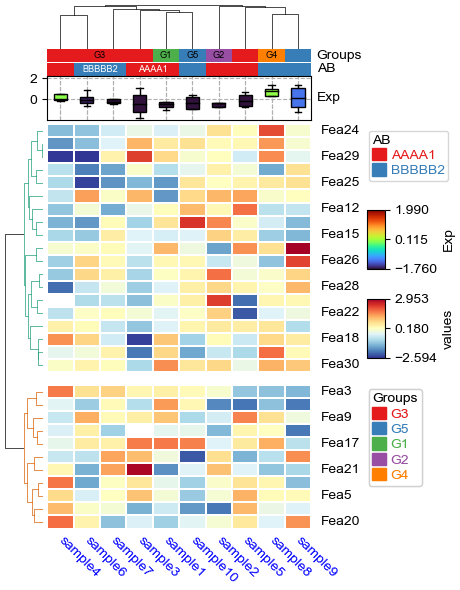

In [48]:
df['Groups']=['G1']+['G2']+['G3']*5+['G4']+['G5']*2
plt.figure(figsize=(4, 6))
cm = ClusterMapPlotter(
        data=df_heatmap, top_annotation=col_ha,
        col_cluster=True,row_cluster=True,show_rownames=True,show_colnames=True,
        row_split=2,row_split_gap=3,row_dendrogram=True,
        label='values',col_dendrogram_kws=dict(linkage=linkage),col_dendrogram=True,
        tree_kws={'col_cmap': 'Set1','row_cmap':'Dark2'},verbose=0,legend_gap=7,
        linewidths=0.05,linecolor='white',cmap='RdYlBu_r',
        xticklabels_kws={'labelrotation':-45,'labelcolor':'blue'})
plt.show()

## Image annotation

In [49]:
df = pd.DataFrame(['AAAA1'] * 5 + ['BBBBB2'] * 5, columns=['AB'])
df['CD'] = ['C'] * 3 + ['D'] * 3 + ['G'] * 4
df['F'] = np.random.normal(0, 1, 10)
df.index = ['sample' + str(i) for i in range(1, df.shape[0] + 1)]
df_box = pd.DataFrame(np.random.randn(10, 4), columns=['Gene' + str(i) for i in range(1, 5)])
df_box.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['TMB1', 'TMB2'])
df_bar.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_scatter = pd.DataFrame(np.random.uniform(0, 10, 10), columns=['Scatter'])
df_scatter.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar1 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T1-A', 'T1-B'])
df_bar1.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar2 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T2-A', 'T2-B'])
df_bar2.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3 = pd.DataFrame(np.random.uniform(0, 10, (10, 2)), columns=['T3-A', 'T3-B'])
df_bar3.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar3.iloc[5,0]=np.nan
df_bar4 = pd.DataFrame(np.random.uniform(0, 10, (10, 1)), columns=['T4'])
df_bar4.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]
df_bar4.iloc[7,0]=np.nan
df_img = pd.DataFrame(['https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/121px-Python-logo-notext.svg.png',
                       'https://motifcollections.aertslab.org/v10nr_clust/logos/metacluster_135.7.png',
                       'https://cdn3.iconfinder.com/data/icons/family-member-flat-happy-family-day/512/Brother-512.png',
                       'https://cdn3.iconfinder.com/data/icons/family-member-flat-happy-family-day/512/Sister-512.png',
                       'https://img.freepik.com/free-vector/sticker-design-with-cute-mouse-isolated_1308-59360.jpg',
                       'https://motifcollections.aertslab.org/v10nr_clust/logos/metacluster_131.8.png',
                       'https://img.freepik.com/premium-vector/vector-illustration-gorilla-isolated-white-background-cartoon-style_1151-66575.jpg',
                      "2.png",'1.jpeg',
                      'https://upload.wikimedia.org/wikipedia/commons/thumb/c/c3/Python-logo-notext.svg/121px-Python-logo-notext.svg.png'], columns=['path'])
df_img.index = ['sample' + str(i) for i in range(1, df_box.shape[0] + 1)]

Starting plotting HeatmapAnnotations


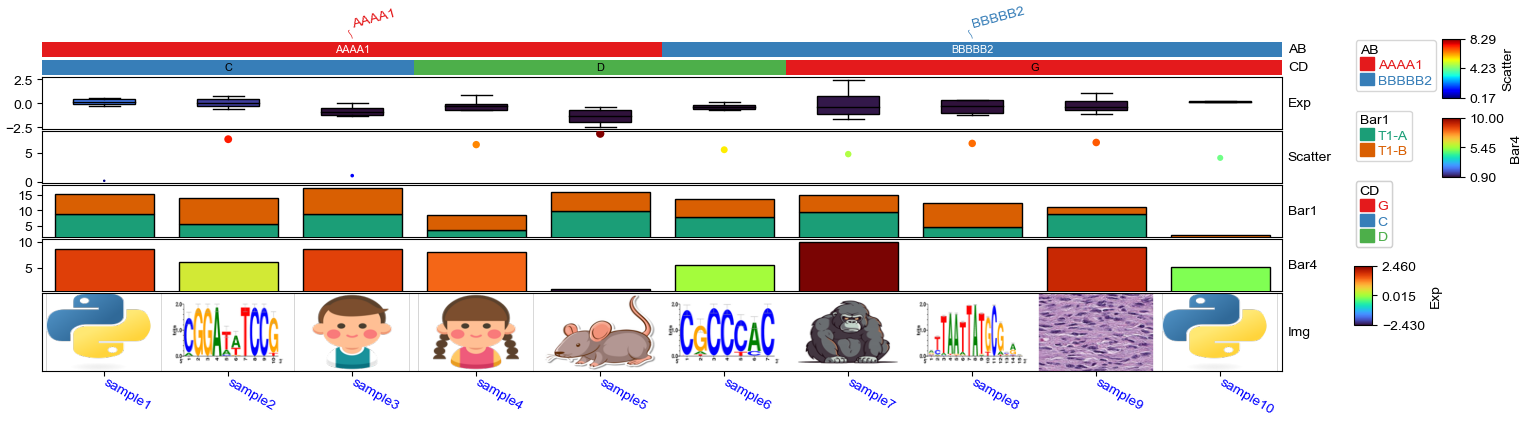

In [50]:
plt.figure(figsize=(16, 4))
col_ha = HeatmapAnnotation(
            label=anno_label(df.AB, merge=True,rotation=15),
            AB=anno_simple(df.AB,add_text=True,legend=True), axis=1,
            CD=anno_simple(df.CD, add_text=True,legend=True,text_kws={'color':'black'}),
            Exp=anno_boxplot(df_box, cmap='turbo',legend=True),
            Scatter=anno_scatterplot(df_scatter), 
            Bar1=anno_barplot(df_bar1,legend=True,cmap='Dark2'),
            Bar4=anno_barplot(df_bar4,legend=True,cmap='turbo'),
            Img=anno_img(df_img.path,border_width=5,border_color=255,height=15),
            plot=True,legend=True,legend_gap=5,hgap=0.5)
col_ha.show_ticklabels(df.index.tolist(),fontdict={'color':'blue'},rotation=-30)
plt.show()

## How to force display all row/col ticklabels?
When the height or width is not big enough to display all xticklabels and yticklabels, some ticklabels will be hidden to avoid overlapping.
For example:

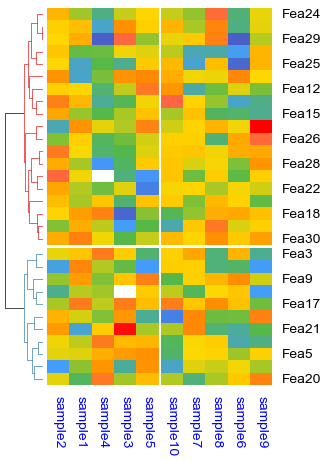

In [51]:
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=True,show_colnames=True,row_names_side='right',
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()

To force display all ticklabels no matter whether the height or width is big enough, set parameters `xticklabels/yticklabels` to True:

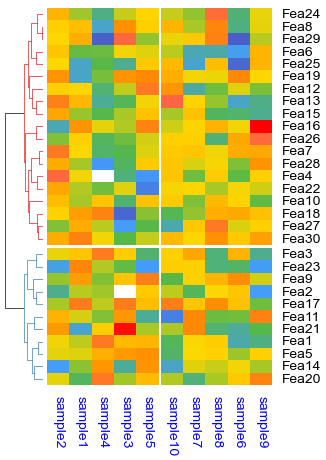

In [52]:
plt.figure(figsize=(3.5, 5))
cm = ClusterMapPlotter(
        data=df_heatmap,
        col_cluster=True,row_cluster=True,
        col_split=df.AB,row_split=2, 
        col_split_gap=0.5,row_split_gap=0.8,
        label='values',row_dendrogram=True,
        show_rownames=True,show_colnames=True,
        row_names_side='right',yticklabels=True,
        tree_kws={'row_cmap': 'Set1'},verbose=0,legend_gap=5,
        cmap='meth2',xticklabels_kws={'labelrotation':-90,'labelcolor':'blue'})
plt.show()